In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [9]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [10]:
X

array([[10.76716633,  7.0419599 ],
       [-6.90372585, -1.86984504],
       [-8.81725228, -4.09671955],
       ...,
       [-4.06849172, 10.09683983],
       [-3.83797826,  8.42689449],
       [ 8.07218047,  7.5111049 ]])

In [7]:
y

array([1, 3, 1, 0, 0, 3, 3, 3, 1, 1, 0, 3, 0, 1, 3, 1, 2, 3, 3, 2, 2, 2,
       3, 0, 1, 2, 0, 0, 1, 1, 2, 0, 2, 2, 2, 3, 0, 0, 3, 0, 0, 0, 0, 0,
       3, 2, 0, 3, 2, 2, 1, 3, 2, 2, 2, 2, 2, 0, 2, 1, 3, 2, 3, 0, 0, 0,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 1, 0, 0, 2, 3, 0, 0, 1, 3,
       1, 1, 3, 1, 0, 3, 2, 1, 3, 2, 1, 1, 2, 2, 0, 2, 3, 3, 3, 3, 0, 3,
       1, 2, 2, 0, 1, 3, 0, 3, 3, 2, 0, 3, 3, 2, 0, 1, 2, 0, 0, 1, 1, 3,
       0, 3, 0, 0, 0, 2, 0, 0, 2, 3, 3, 2, 0, 3, 3, 2, 2, 0, 0, 1, 3, 1,
       3, 2, 2, 1, 0, 1, 1, 3, 0, 2, 3, 3, 2, 0, 1, 0, 3, 2, 2, 3, 1, 0,
       0, 3, 2, 0, 0, 2, 2, 1, 3, 3, 1, 3, 3, 1, 2, 1, 1, 0, 3, 0, 2, 3,
       0, 2, 3, 1, 0, 0, 1, 1, 0, 0, 3, 3, 0, 1, 1, 3, 0, 0, 1, 3, 1, 0,
       1, 0, 3, 2, 2, 3, 1, 1, 0, 0, 1, 2, 2, 3, 0, 1, 1, 1, 2, 3, 3, 2,
       0, 2, 1, 2, 2, 0, 0, 1, 3, 3, 1, 0, 2, 0, 2, 3, 3, 1, 0, 2, 1, 3,
       0, 0, 1, 1, 3, 0, 0, 0, 2, 3, 1, 3, 3, 1, 0, 1, 1, 0, 0, 2, 3, 0,
       0, 0, 3, 3, 3, 0, 1, 2, 0, 0, 3, 3, 2, 0, 2,

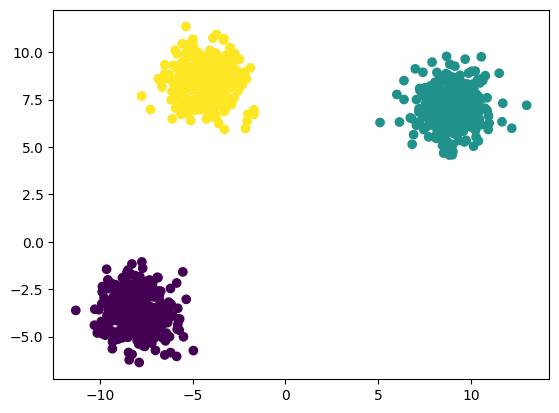

In [11]:
plt.scatter(X[:,0],X[:,1],c=y)

In [12]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [15]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [16]:
from sklearn.cluster import KMeans

In [17]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [18]:
wcss

[1500.0,
 458.5459500399896,
 40.21992201626083,
 34.73626055185537,
 29.381787662810872,
 24.095361582750797,
 21.706424442459024,
 19.454092859621767,
 17.466507307345225,
 15.851680652629291]

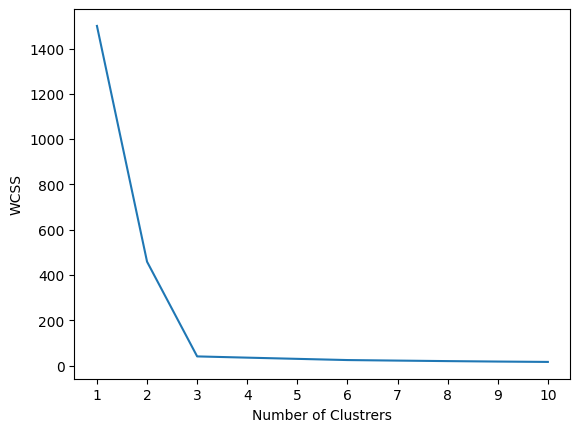

In [19]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [20]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [21]:
kmeans.fit_predict(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 2, 2,
       2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 0, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1,
       2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1,
       0, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2,
       1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0,
       2, 1, 0, 1, 0, 2, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2,
       1, 2, 0, 1, 0, 0, 1, 2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2,
       1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 2, 1, 0, 2,

In [22]:
y_pred=kmeans.predict(X_test_scaled)

In [23]:
y_pred

array([2, 2, 2, 2, 0, 1, 2, 0, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1,
       1, 2, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1,
       2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0,
       2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 1, 0, 2, 1,
       2, 0, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 1,
       2, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0,
       2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 2, 0, 2, 1, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2,
       2, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1,
       1, 1, 1, 1, 0, 1, 0, 2], dtype=int32)

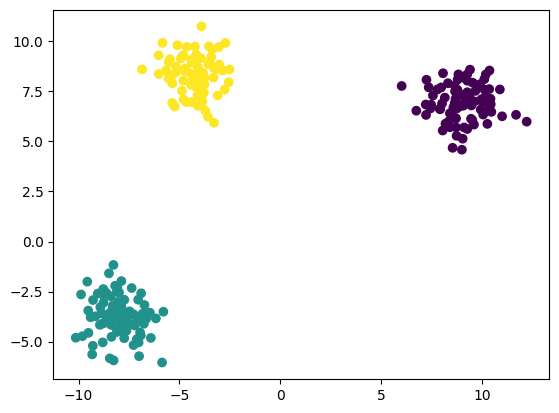

In [24]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [ ]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [25]:
## kneelocator
!pip install kneed

In [26]:
from kneed import KneeLocator

In [27]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [28]:
kl.elbow

3

In [29]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [30]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [31]:
silhouette_coefficients

[0.687149480346692,
 0.850614150516352,
 0.6902793385440685,
 0.5168159436257815,
 0.35355962079671044,
 0.35311258851204985,
 0.34833556729634924,
 0.339311628049081,
 0.3421722590509924]

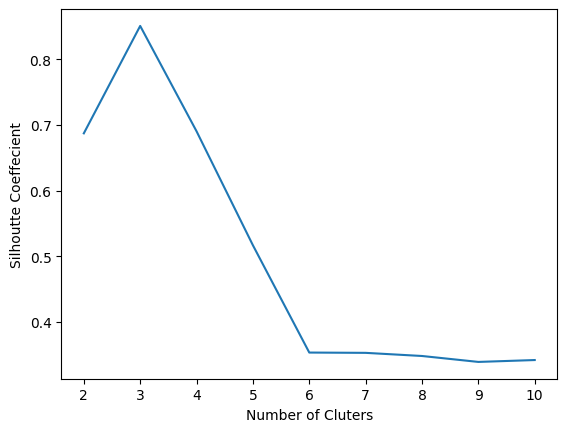

In [32]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()